# Example for reading map-file for example Tol
The map.nc file is read and *variable* is extracted. Next, the mesh data for the final time-step is converted to a raster and saved to a .tiff 

In [1]:
import os
import sys
from pathlib import Path

import matplotlib.pyplot as plt

currentdir = os.path.dirname(os.getcwd())
sys.path.append(currentdir + r"/HydroLogic_Inundation_toolbox")
sys.path.append(currentdir + r"/HydroLogic_Inundation_toolbox/Readers")

from flowmeshreader import load_map_data, mesh_to_tiff
from plotting import raster_plot_with_context

In [2]:
# set paths
input_file_path = currentdir + r"/HydroLogic_Inundation_toolbox/Data/Tol/input/1PT10_map.nc"
output_file_path = currentdir + r"/HydroLogic_Inundation_toolbox/Data/Tol/output/final_waterdepth.tiff"
Path(currentdir + r"/HydroLogic_Inundation_toolbox/Data/Tol/output").mkdir(exist_ok=True)

In [3]:
# raster options
resolution = 10  # m
distance_tol = 36  # m
interpolation = r"nearest"

In [4]:
variable = r"Mesh2d_waterdepth"

In [5]:
# load mesh coordinates and data from netCDF 
map_data = load_map_data(input_file_path, variable)

In [6]:
# convert to raster and save as tiff
_, _, grid_data = mesh_to_tiff(
    map_data[-1, :],
    input_file_path,
    output_file_path,
    resolution,
    distance_tol,
    interpolation=interpolation,
)

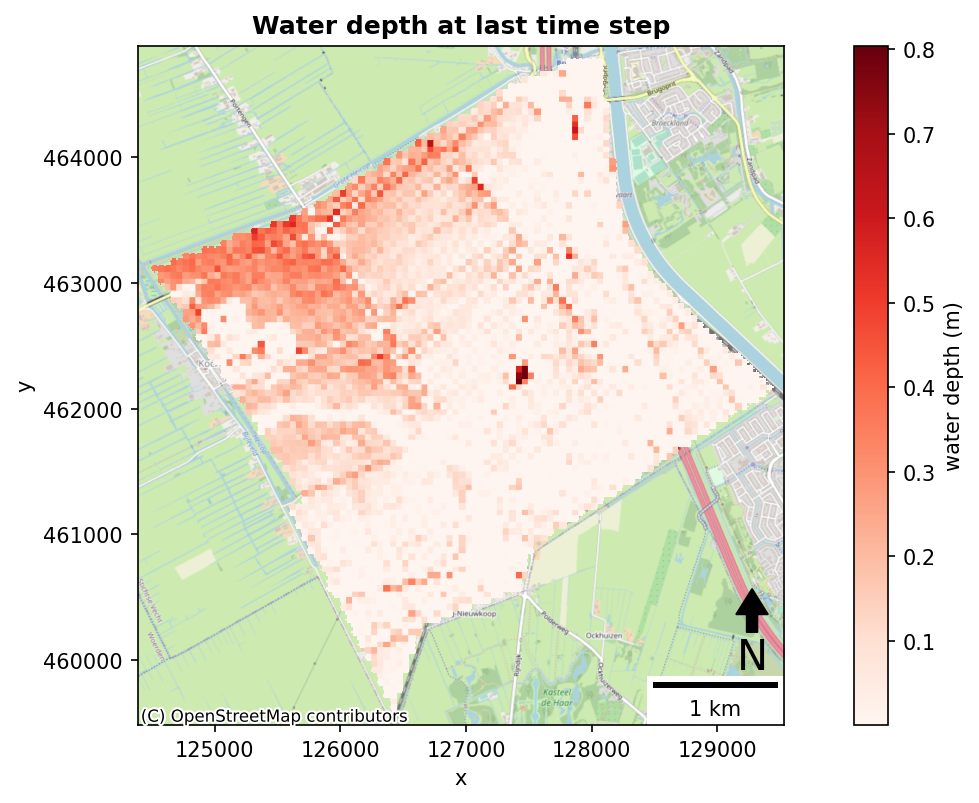

In [7]:
fig, ax = raster_plot_with_context(
    raster_path = output_file_path, 
    epsg = 28992, 
    clabel = "water depth (m)", 
    cmap = "Reds", 
    title = "Water depth at last time step",
    )